In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action = 'ignore')
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go

In [2]:
train_raw = pd.read_csv('train.csv', index_col = 'Date', parse_dates = True)
stores_raw = pd.read_csv('stores.csv')
features_raw = pd.read_csv('features.csv', index_col = 'Date', parse_dates = True)
test_raw = pd.read_csv('test.csv', index_col = 'Date', parse_dates = True)
names_raw = pd.read_csv('Walmart_Department_Name.csv')
train = train_raw.copy()
stores = stores_raw.copy()
features = features_raw.copy()
test = test_raw.copy()
names = names_raw.copy()

In [3]:
holidays = pd.DataFrame({'Holiday': ['Super Bowl', 'Labor Day', 'Thanksgiving', 'Christmas', 'Super Bowl', 'Labor Day', 'Thanksgiving', 'Christmas', 'Super Bowl', 'Labor Day']},
                        index = train.loc[train.IsHoliday == True].index.unique())

In [4]:
features = features_raw[['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']]

In [5]:
features.head()

,Store,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday
Date,,,,,,
2010-02-05,1,42.31,2.572,211.096358,8.106,False
2010-02-12,1,38.51,2.548,211.242170,8.106,True
2010-02-19,1,39.93,2.514,211.289143,8.106,False
2010-02-26,1,46.63,2.561,211.319643,8.106,False
2010-03-05,1,46.50,2.625,211.350143,8.106,False


In [6]:
dept_names = pd.merge(train, names, left_on = 'Dept', right_on = 'Id').drop('Id', axis = 1)
dept_names = pd.merge(dept_names, stores, on = 'Store')
dept_names.index = train.index

In [7]:
dept_names.head()

,Store,Dept,Weekly_Sales,IsHoliday,Name,Type,Size
Date,,,,,,,
2010-02-05,1,1,24924.50,False,Candy and Tobacco,A,151315
2010-02-12,1,1,46039.49,True,Candy and Tobacco,A,151315
2010-02-19,1,1,41595.55,False,Candy and Tobacco,A,151315
2010-02-26,1,1,19403.54,False,Candy and Tobacco,A,151315
2010-03-05,1,1,21827.90,False,Candy and Tobacco,A,151315


In [8]:
dept_names.reset_index(inplace = True)
features.reset_index(inplace = True)
final_df = pd.merge(dept_names, features, on = ['Store', 'Date']).drop('IsHoliday_y', axis = 1).set_index('Date')
dept_names.set_index('Date', inplace = True)
features.set_index('Date', inplace = True)

In [9]:
final_df = final_df.sort_values(['Store', 'Dept'])
final_df.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Name,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,Candy and Tobacco,A,151315,42.31,2.572,211.096358,8.106
2010-02-12,1,1,46039.49,True,Candy and Tobacco,A,151315,38.51,2.548,211.242170,8.106
2010-02-19,1,1,41595.55,False,Candy and Tobacco,A,151315,39.93,2.514,211.289143,8.106
2010-02-26,1,1,19403.54,False,Candy and Tobacco,A,151315,46.63,2.561,211.319643,8.106
2010-03-05,1,1,21827.90,False,Candy and Tobacco,A,151315,46.50,2.625,211.350143,8.106


In [10]:
final_df.loc[(final_df.Name == ' Prescription Pharmacy') & (final_df.Type == 'C')]

,Store,Dept,Weekly_Sales,IsHoliday_x,Name,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,,,,,
2010-02-05,30,38,62401.01,False,Prescription Pharmacy,C,42988,39.05,2.572,210.752605,8.324
2010-02-12,30,38,53977.43,True,Prescription Pharmacy,C,42988,37.77,2.548,210.897994,8.324
2010-02-19,30,38,67650.63,False,Prescription Pharmacy,C,42988,39.75,2.514,210.945160,8.324
2010-02-26,30,38,66184.41,False,Prescription Pharmacy,C,42988,45.31,2.561,210.975957,8.324
2010-03-05,30,38,66658.17,False,Prescription Pharmacy,C,42988,48.61,2.625,211.006754,8.324
...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,44,38,65599.95,False,Prescription Pharmacy,C,39910,64.80,3.821,131.043000,5.407
2012-10-05,44,38,47446.98,False,Prescription Pharmacy,C,39910,61.79,3.815,131.075667,5.217
2012-10-12,44,38,42451.51,False,Prescription Pharmacy,C,39910,55.10,3.797,131.108333,5.217


Plotting various features vs time

In [11]:
def feature_x_time(feature = 'Temperature', store = 1):
    temp = features.loc[features.Store == store][feature]
    fig = px.line(data_frame = temp, x = temp.index, y = temp.values, title = f"{feature} vs Time in Store {store} area")
    fig.update_layout(width = 1380, height = 450, paper_bgcolor="white")
    fig.show()

In [12]:
widgets.interact(feature_x_time, feature = widgets.ToggleButtons(options = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']), store = features.Store.unique());

interactive(children=(ToggleButtons(description='feature', options=('Temperature', 'Fuel_Price', 'CPI', 'Unemp…

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

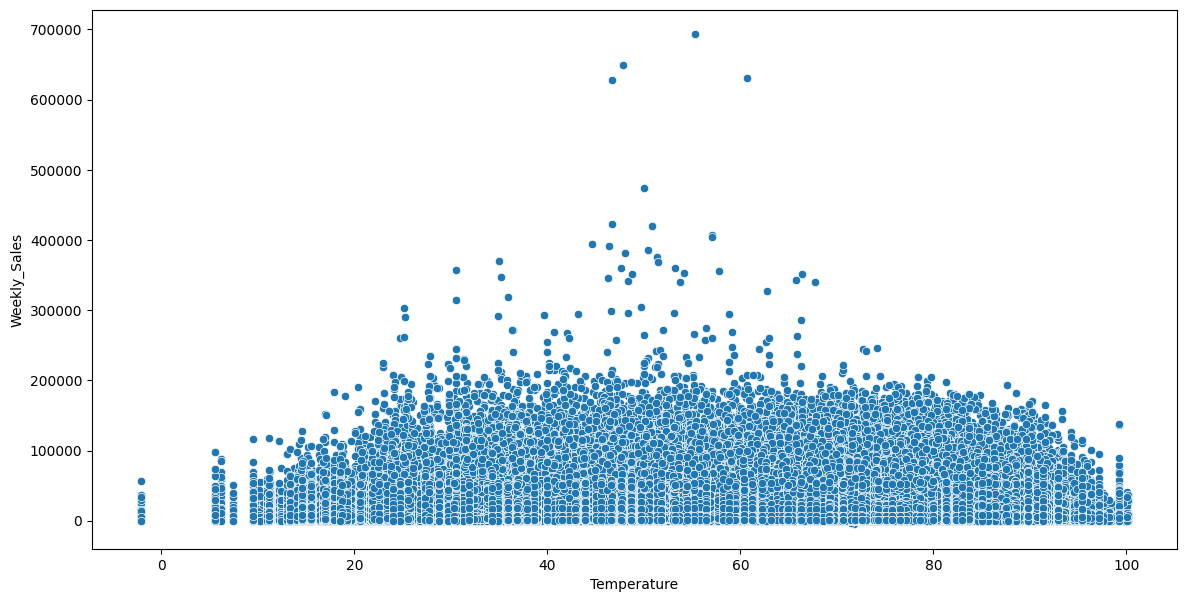

In [13]:
fig, ax = plt.subplots(figsize = (14,7))
sns.scatterplot(x = final_df.Temperature, y = final_df.Weekly_Sales)

Temp vs Sales

In [14]:
def temp1(department):
    temp = final_df.loc[(final_df.Store == 1) & (final_df.Dept == department)]
    p = sns.jointplot(x = temp.Temperature, y = temp.Weekly_Sales, fill = True, levels = 100, kind="kde", height = 6, ratio = 4, space = 0, cmap="mako", 
                  marginal_kws = {'color': 'purple', 'fill': True})
    p.fig.suptitle(f"{names.loc[names.Id == department]['Name'].values[0]}")
    p.fig.tight_layout()

In [15]:
widgets.interact(temp1, department = final_df.loc[final_df.Store == 1]['Dept'].unique())

interactive(children=(Dropdown(description='department', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1…

<function __main__.temp1(department)>

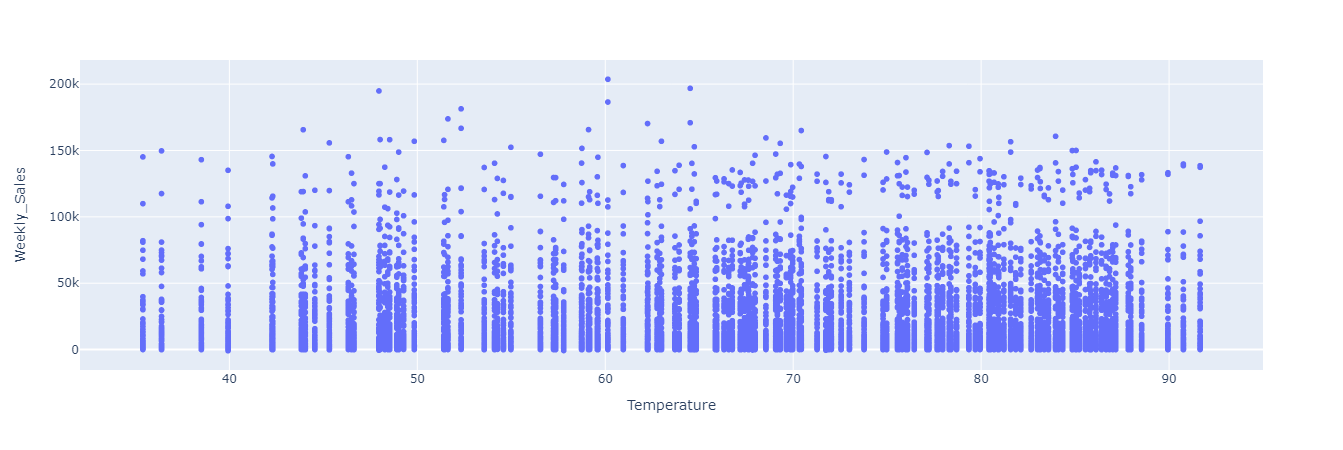

In [16]:
temp = final_df.loc[(final_df.Store == 1)]
fig = px.scatter(data_frame = temp, x = temp.Temperature, y = temp.Weekly_Sales)
fig.update_layout(width = 1380, height = 450, paper_bgcolor="white")

In [17]:
temp = final_df.loc[(final_df.Store == 5) & (final_df.Dept == 38) & (final_df.Type == 'C')]

In [18]:
temp

,Store,Dept,Weekly_Sales,IsHoliday_x,Name,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,,,,,


In [19]:
# fig = px.line(data_frame = temp, x = temp.index, y = temp.Weekly_Sales)
# fig.show()

<Axes: >

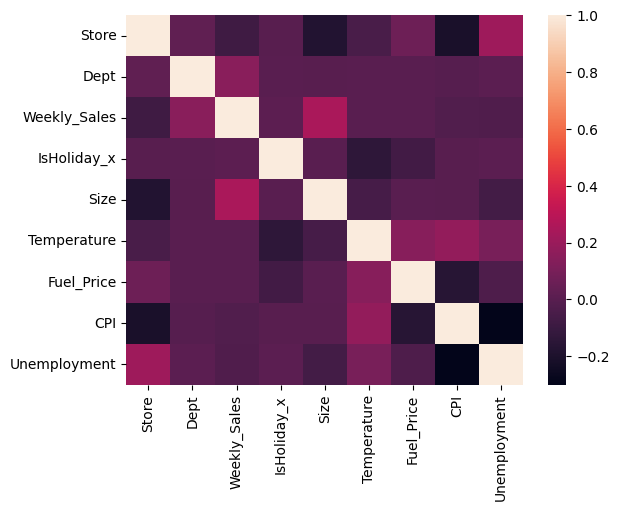

In [20]:
sns.heatmap(final_df.corr())

In [21]:
final_df.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Name,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,Candy and Tobacco,A,151315,42.31,2.572,211.096358,8.106
2010-02-12,1,1,46039.49,True,Candy and Tobacco,A,151315,38.51,2.548,211.242170,8.106
2010-02-19,1,1,41595.55,False,Candy and Tobacco,A,151315,39.93,2.514,211.289143,8.106
2010-02-26,1,1,19403.54,False,Candy and Tobacco,A,151315,46.63,2.561,211.319643,8.106
2010-03-05,1,1,21827.90,False,Candy and Tobacco,A,151315,46.50,2.625,211.350143,8.106


<Axes: xlabel='Temperature', ylabel='Count'>

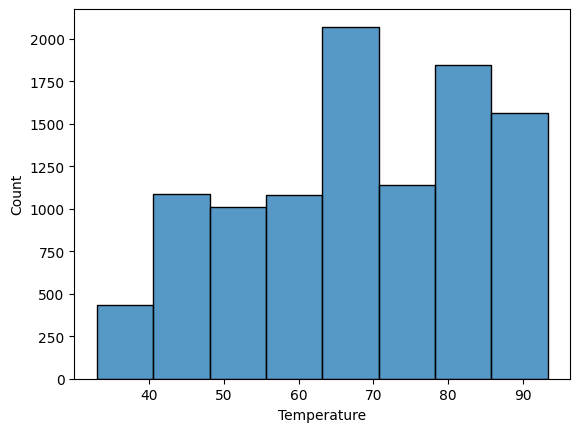

In [22]:
# sns.histplot(data = final_df.loc[final_df.Store == 1]['Weekly_Sales'])
sns.histplot(data = final_df.loc[final_df.Store == 2]['Temperature'], bins = 8)

In [23]:
final_df.loc[final_df.Store == 2]['Temperature'].max()

93.34

In [24]:
x = final_df['Temperature'].apply(lambda x: round(((x - 32) * 0.55555), 2))

In [25]:
x.min()

-18.92

In [26]:
x

Date
2010-02-05     5.73
2010-02-12     3.62
2010-02-19     4.41
2010-02-26     8.13
2010-03-05     8.06
              ...  
2012-09-28    18.27
2012-10-05    18.27
2012-10-12    12.48
2012-10-19    13.59
2012-10-26    14.92
Name: Temperature, Length: 421570, dtype: float64

In [27]:
# y = pd.cut(x, bins = 12, labels = [f"{i}°C to {i + 5}°C" for i in range(-20,35,5)])

In [28]:
# y.value_counts()

In [29]:
final_df['Temperature_C'] = final_df['Temperature'].apply(lambda x: round(((x - 32) * 0.55555), 2))
final_df['Temperature_C_bin'] = pd.cut(x = final_df['Temperature'].apply(lambda x: round(((x - 32) * 0.55555), 2)),
                                   bins = 12,
                                   labels = [f"{i}°C to {i + 5}°C" for i in range(-20,40,5)])

In [30]:
for i in range(-20,40,5):
    print(i)

-20
-15
-10
-5
0
5
10
15
20
25
30
35


In [31]:
final_df

,Store,Dept,Weekly_Sales,IsHoliday_x,Name,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Temperature_C,Temperature_C_bin
Date,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,Candy and Tobacco,A,151315,42.31,2.572,211.096358,8.106,5.73,5°C to 10°C
2010-02-12,1,1,46039.49,True,Candy and Tobacco,A,151315,38.51,2.548,211.242170,8.106,3.62,0°C to 5°C
2010-02-19,1,1,41595.55,False,Candy and Tobacco,A,151315,39.93,2.514,211.289143,8.106,4.41,0°C to 5°C
2010-02-26,1,1,19403.54,False,Candy and Tobacco,A,151315,46.63,2.561,211.319643,8.106,8.13,5°C to 10°C
2010-03-05,1,1,21827.90,False,Candy and Tobacco,A,151315,46.50,2.625,211.350143,8.106,8.06,5°C to 10°C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,98,508.37,False,Bakery,B,118221,64.88,3.997,192.013558,8.684,18.27,15°C to 20°C
2012-10-05,45,98,628.10,False,Bakery,B,118221,64.89,3.985,192.170412,8.667,18.27,15°C to 20°C
2012-10-12,45,98,1061.02,False,Bakery,B,118221,54.47,4.000,192.327265,8.667,12.48,10°C to 15°C


In [32]:
final_df.Temperature_C_bin.value_counts()

20°C to 25°C      75443
15°C to 20°C      64310
25°C to 30°C      58723
10°C to 15°C      57581
5°C to 10°C       50702
30°C to 35°C      39041
0°C to 5°C        34537
-5°C to 0°C       23562
-10°C to -5°C      9876
35°C to 40°C       5730
-15°C to -10°C     1859
-20°C to -15°C      206
Name: Temperature_C_bin, dtype: int64

In [33]:
x1 = final_df.groupby('Temperature_C_bin')['Weekly_Sales'].sum().sort_values()

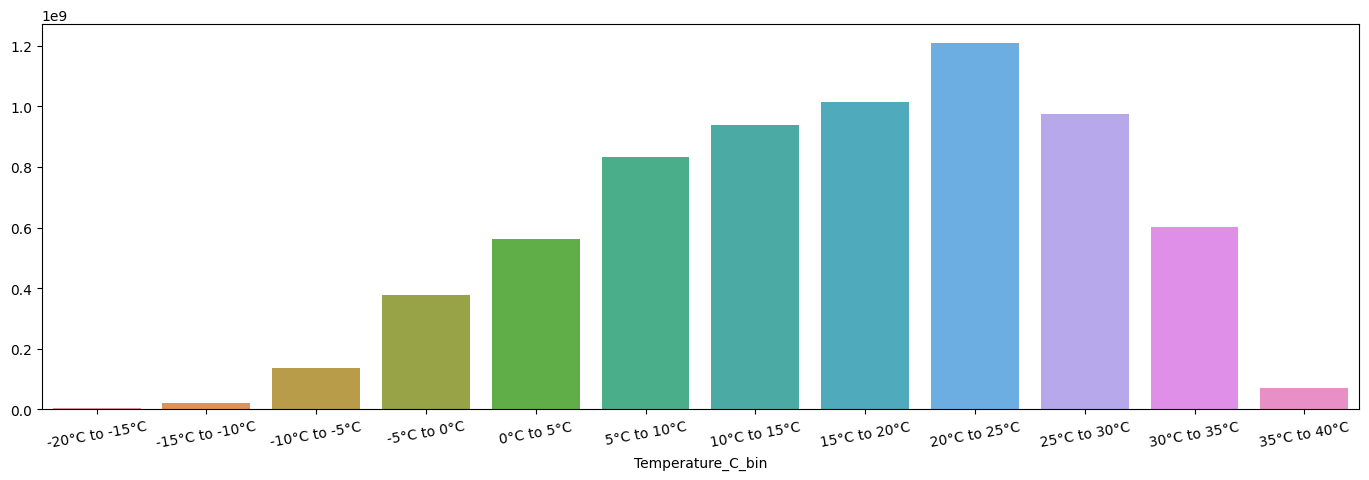

In [34]:
fig, ax = plt.subplots(figsize = (17, 5))
sns.barplot(x = x1.index, y = x1.values)
plt.xticks(rotation = 10);

In [35]:
holiday_df = final_df.loc[holidays.index]
holiday_df.head()

,Store,Dept,Weekly_Sales,IsHoliday_x,Name,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Temperature_C,Temperature_C_bin
Date,,,,,,,,,,,,,
2010-02-12,1,1,46039.49,True,Candy and Tobacco,A,151315,38.51,2.548,211.24217,8.106,3.62,0°C to 5°C
2010-02-12,1,2,44682.74,True,Health and Beauty,A,151315,38.51,2.548,211.24217,8.106,3.62,0°C to 5°C
2010-02-12,1,3,10887.84,True,Stationery,A,151315,38.51,2.548,211.24217,8.106,3.62,0°C to 5°C
2010-02-12,1,4,35351.21,True,Paper Goods,A,151315,38.51,2.548,211.24217,8.106,3.62,0°C to 5°C
2010-02-12,1,5,29620.81,True,Media and Gaming,A,151315,38.51,2.548,211.24217,8.106,3.62,0°C to 5°C


In [36]:
holiday_df.groupby(holiday_df.index).aggregate({'Weekly_Sales': 'sum', 'Temperature_C': 'mean'})

,Weekly_Sales,Temperature_C
Date,,
2010-02-12,47658672.41,0.756414
2010-09-10,45026332.92,22.182077
2010-11-26,62208081.25,8.519520
2010-12-31,41122495.74,2.271933
2011-02-11,46748506.24,-0.307914
2011-09-09,46136522.71,22.738905
2011-11-25,63352841.55,9.509742
2011-12-30,46502541.69,3.054572
2012-02-10,49039347.91,4.008747


In [37]:
holiday_df['Month'] = holiday_df.index.month_name()

In [38]:
final_df

,Store,Dept,Weekly_Sales,IsHoliday_x,Name,Type,Size,Temperature,Fuel_Price,CPI,Unemployment,Temperature_C,Temperature_C_bin
Date,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,Candy and Tobacco,A,151315,42.31,2.572,211.096358,8.106,5.73,5°C to 10°C
2010-02-12,1,1,46039.49,True,Candy and Tobacco,A,151315,38.51,2.548,211.242170,8.106,3.62,0°C to 5°C
2010-02-19,1,1,41595.55,False,Candy and Tobacco,A,151315,39.93,2.514,211.289143,8.106,4.41,0°C to 5°C
2010-02-26,1,1,19403.54,False,Candy and Tobacco,A,151315,46.63,2.561,211.319643,8.106,8.13,5°C to 10°C
2010-03-05,1,1,21827.90,False,Candy and Tobacco,A,151315,46.50,2.625,211.350143,8.106,8.06,5°C to 10°C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,45,98,508.37,False,Bakery,B,118221,64.88,3.997,192.013558,8.684,18.27,15°C to 20°C
2012-10-05,45,98,628.10,False,Bakery,B,118221,64.89,3.985,192.170412,8.667,18.27,15°C to 20°C
2012-10-12,45,98,1061.02,False,Bakery,B,118221,54.47,4.000,192.327265,8.667,12.48,10°C to 15°C


In [39]:
store1dept1 = final_df.loc[(final_df.Store == 1) & (final_df.Dept == 2)]

<Axes: xlabel='Date', ylabel='Temperature_C'>

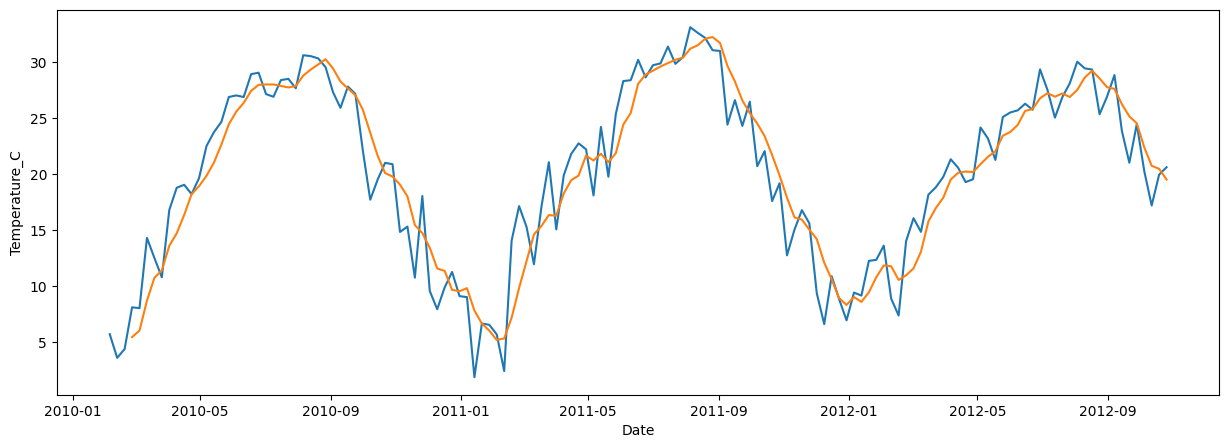

In [40]:
fig, ax = plt.subplots(figsize = (15, 5))
sns.lineplot(x = store1dept1.index, y = store1dept1.Temperature_C)
sns.lineplot(x = store1dept1.index, y = store1dept1.Temperature_C.rolling(4).mean().values)

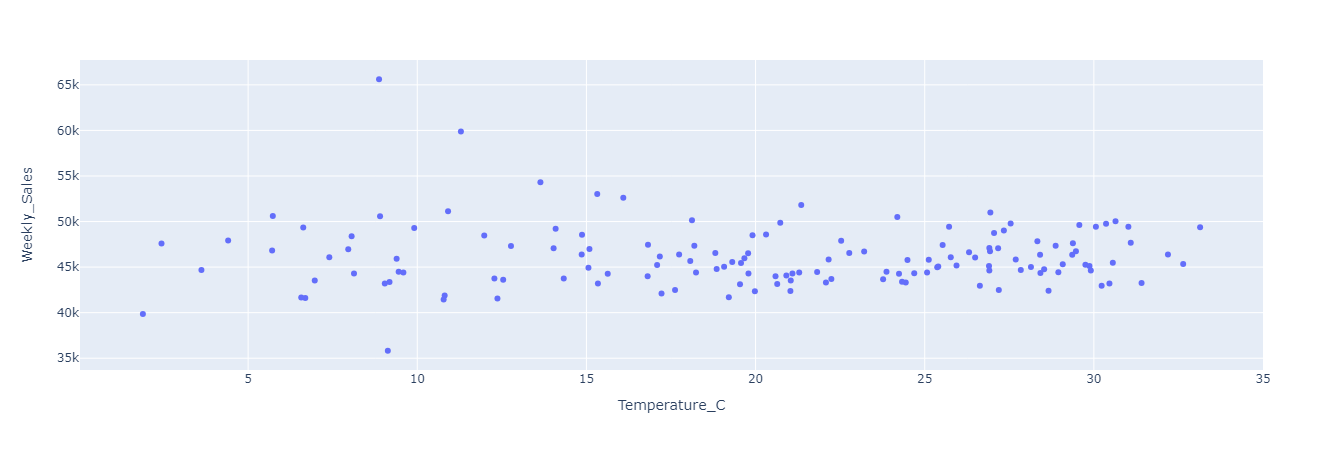

In [41]:
temp = final_df.loc[(final_df.Store == 1) & (final_df.Dept == 2)]
fig = px.scatter(data_frame = temp, x = temp.Temperature_C, y = temp.Weekly_Sales)
fig.update_layout(width = 1380, height = 450, paper_bgcolor="white")

In [42]:
store_weekly_sales = train.groupby(['Store', 'Date'])['Weekly_Sales'].sum().reset_index()
features1 = features_raw[['Store', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday']]
features1 = features1['2010-02-05':'2012-10-26']
overall = pd.merge(store_weekly_sales, features1, left_on = ['Date', 'Store'], right_on = [features1.index, 'Store'])
overall = overall.set_index('Date')

In [43]:
highest_sales_week = ['2010-12-10', '2011-12-09', '2010-12-17', '2011-12-16', '2010-12-24', '2011-12-23', '2010-12-31', '2011-12-30', '2010-11-26', '2011-11-25',
                     '2010-02-12', '2011-02-11', '2012-02-10', '2010-09-10', '2011-09-09', '2012-09-07']

In [44]:
overall_holiday_removed = overall.copy()

Replacing all holiday shopping with store median

In [45]:
for i in range(1, 46):
    median = overall.loc[overall.Store == i].Weekly_Sales.median()
    for j in highest_sales_week:
        overall_holiday_removed.loc[(overall_holiday_removed.Store == i) & (overall.index == j), 'Weekly_Sales'] = median

In [46]:
overall_holiday_removed['Temperature_C'] = overall_holiday_removed['Temperature'].apply(lambda x: round(((x - 32) * 0.55555), 2))
overall_holiday_removed['Temperature_C_bin'] = pd.cut(x = overall_holiday_removed['Temperature'].apply(lambda x: round(((x - 32) * 0.55555), 2)),
                                                      bins = 12,
                                                      labels = [f"{i}°C to {i + 5}°C" for i in range(-20,40,5)])

In [47]:
overall_holiday_removed.head()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Temperature_C,Temperature_C_bin
Date,,,,,,,,,
2010-02-05,1,1643690.90,42.31,2.572,211.096358,8.106,False,5.73,5°C to 10°C
2010-02-12,1,1534849.64,38.51,2.548,211.242170,8.106,True,3.62,0°C to 5°C
2010-02-19,1,1611968.17,39.93,2.514,211.289143,8.106,False,4.41,0°C to 5°C
2010-02-26,1,1409727.59,46.63,2.561,211.319643,8.106,False,8.13,5°C to 10°C
2010-03-05,1,1554806.68,46.50,2.625,211.350143,8.106,False,8.06,5°C to 10°C


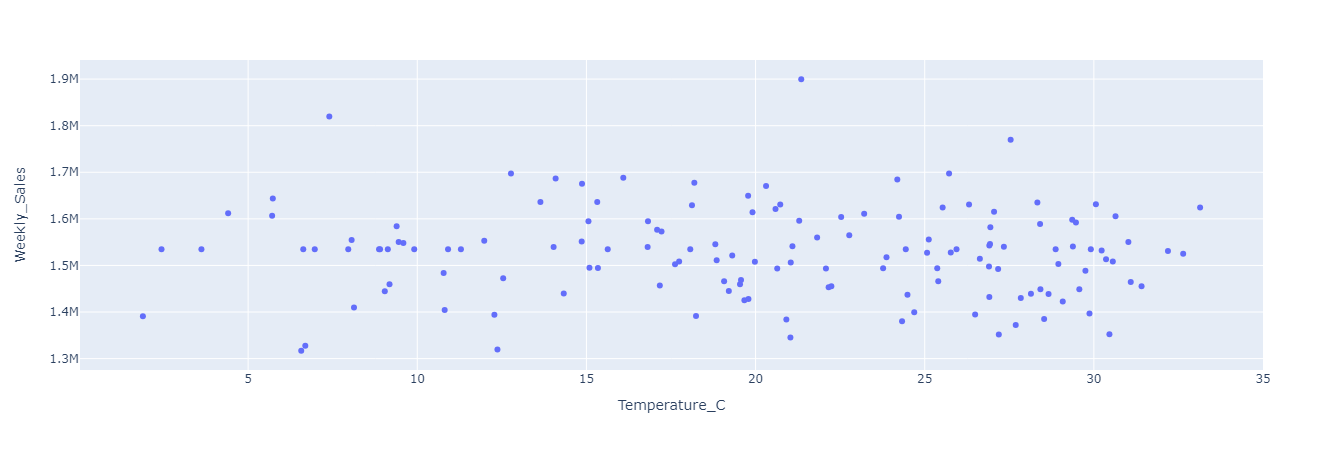

In [48]:
temp = overall_holiday_removed.loc[(overall_holiday_removed.Store == 1)]
fig = px.scatter(data_frame = temp, x = temp.Temperature_C, y = temp.Weekly_Sales)
fig.update_layout(width = 1380, height = 450, paper_bgcolor="white")

In [49]:
store1 = overall_holiday_removed.loc[overall_holiday_removed.Store == 1]
store1.Temperature.corr(store1.Weekly_Sales)

-0.03910610387858013

In [50]:
def lin_relation(store = 1, feature = 'Temperature'):
    temp = overall_holiday_removed.loc[overall_holiday_removed.Store == store]
    fig = px.scatter(data_frame = temp, x = temp[feature], y = temp.Weekly_Sales)
    fig.update_layout(width = 1380, height = 450, paper_bgcolor="white")
    fig.add_annotation(text = f"Pearson's Correlation {round(temp[feature].corr(temp.Weekly_Sales), 3)}",
                  xref = "paper", yref = "paper",
                  x = 1, y = 1, showarrow = False)
    fig.show();

In [51]:
widgets.interact(lin_relation, store = features.Store.unique(), feature = widgets.ToggleButtons(options = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']));

interactive(children=(Dropdown(description='store', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…

In [52]:
def pairplot(store = 1):
    temp = overall_holiday_removed.loc[overall_holiday_removed.Store == store]
    temp = temp[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales']]
    sns.pairplot(temp, corner = True)

In [53]:
widgets.interact(pairplot, store = overall_holiday_removed.Store.unique());

interactive(children=(Dropdown(description='store', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15…